In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas.core.groupby.groupby import DataFrame
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('Netflix_data.csv', header=0)
df.head()

,Unnamed: 0,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies


In [ ]:
x = df['country'].isnull().values.any()
y = df['director'].isnull().values.any()
print(x)
print(y)

True
True


In [ ]:
df = df.drop(['Unnamed: 0','listed_in', 'listed_in1', 'listed_in2', 'listed_in3'],axis=1)
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['director'].replace(np.nan, 'No Data',inplace  = True)

df.dropna(inplace=True)

df.drop_duplicates(inplace= True)
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 686.7+ KB


In [ ]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.duplicated().value_counts()

False    8790
dtype: int64

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.date_added = pd.to_datetime(df_clean.date_added)

In [ ]:
df_tv = df_clean[df_clean.type == 'TV Show']
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season


In [ ]:
temp_dur = df_tv.duration.str.split(' ',expand=True)
df_tv['duration_season'] = temp_dur[0]
df_tv = df_tv.drop('duration',axis=1)
df_tv.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,show_id,type,title,director,country,date_added,release_year,rating,duration_season
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1


We note from the chart below that if we ignore the one-part series, the common ratio between 2 and 5 season

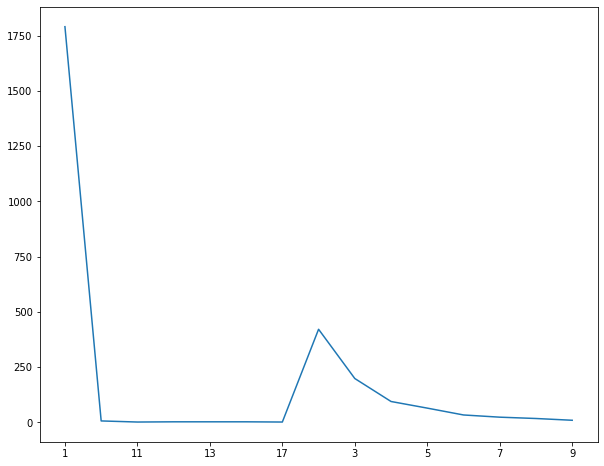

In [ ]:
plt.figure(figsize=[10,8])

df_tv['duration_season'].value_counts().sort_index().plot.line()

In [ ]:
df_directores = df_tv[df_tv['director'] != 'Not Given']
directores = df_directores['director'].value_counts()
directores.head()

Alastair Fothergill             14
Mark Thornton, Todd Kauffman     5
No Data                          4
Stan Lathan                      3
Hsu Fu-chun                      2
Name: director, dtype: int64

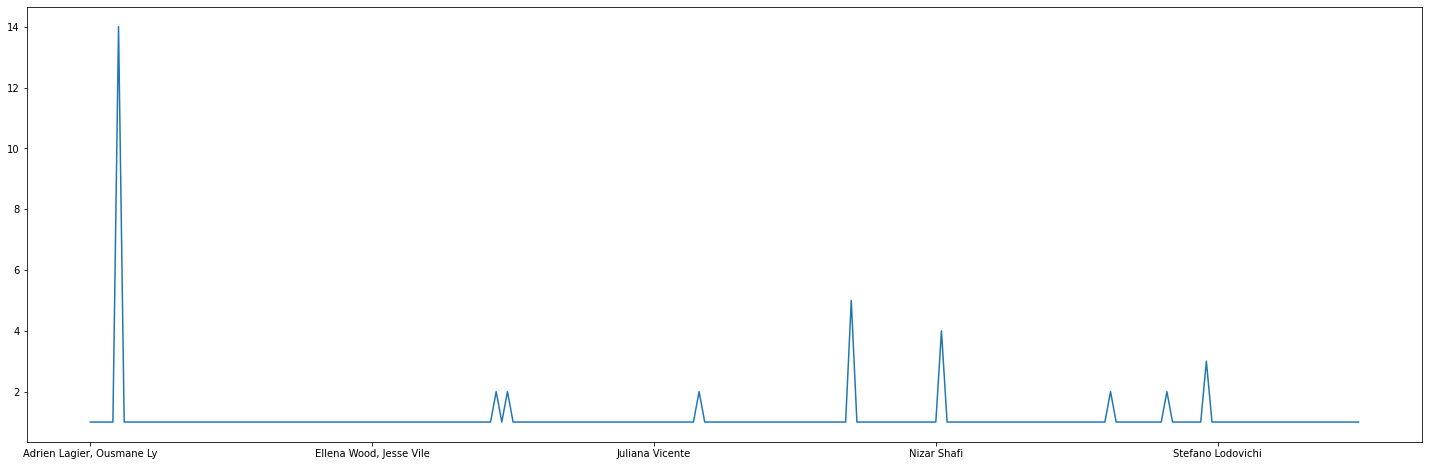

In [ ]:
plt.figure(figsize=[25,8])

directores.sort_index().plot.line()

Text(0, 0.5, 'Number of TV Shows')

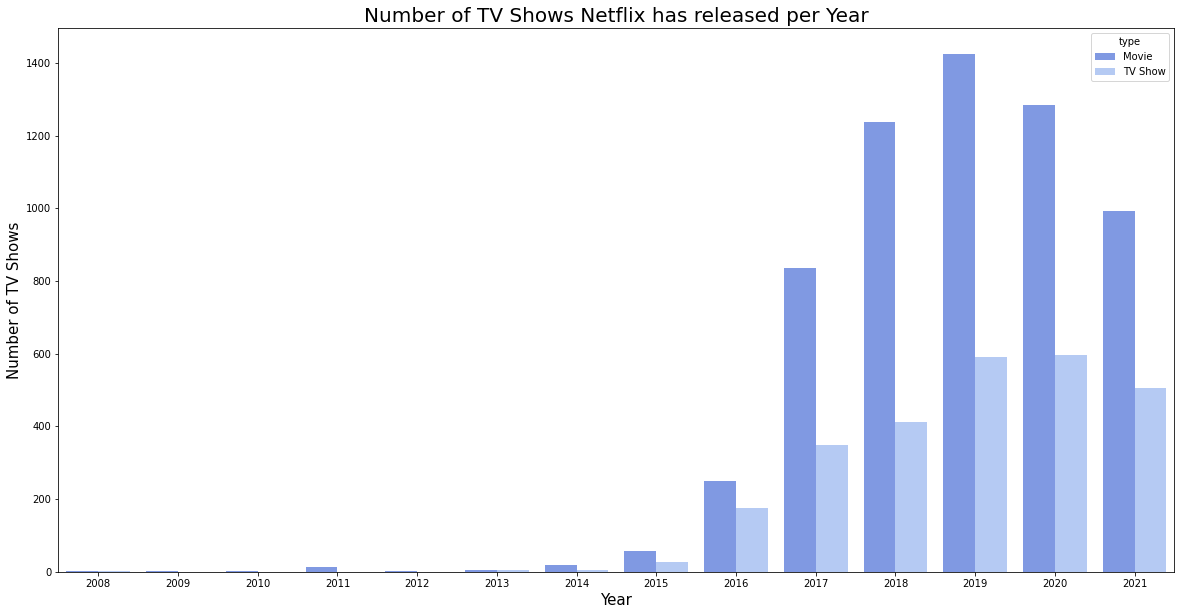

In [ ]:
plt.figure(figsize=[20,10])
base_color = sns.color_palette('coolwarm',n_colors=5)
tv_movie = sns.countplot(x=df_clean.date_added.dt.year, data=df_clean, hue='type', palette = base_color)
tv_movie.set_title("Number of TV Shows Netflix has released per Year",fontsize = 20)
tv_movie.set_xlabel('Year',fontsize = 15)
tv_movie.set_ylabel('Number of TV Shows',fontsize = 15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


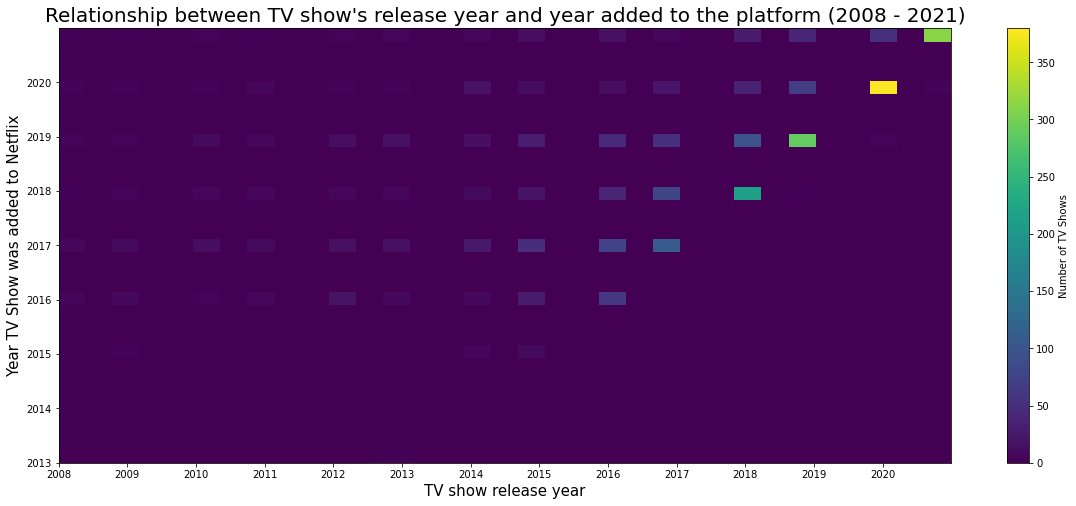

In [ ]:
plt.figure(figsize=[20,8])
ry_f = df_tv.release_year>2007
da_f = df_tv.date_added.dt.year>2008
df_tv_f = df_tv[ry_f][da_f]
tv_rd1 = plt.hist2d(data=df_tv_f,x='release_year',y=df_tv_f.date_added.dt.year, bins=33)
plt.xticks(np.arange(2008,2021,1));
plt.yticks(np.arange(2013,2021,1));
plt.xlabel('TV show release year',fontsize = 15)
plt.ylabel('Year TV Show was added to Netflix',fontsize = 15)
plt.title("Relationship between TV show's release year and year added to the platform (2008 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of TV Shows')

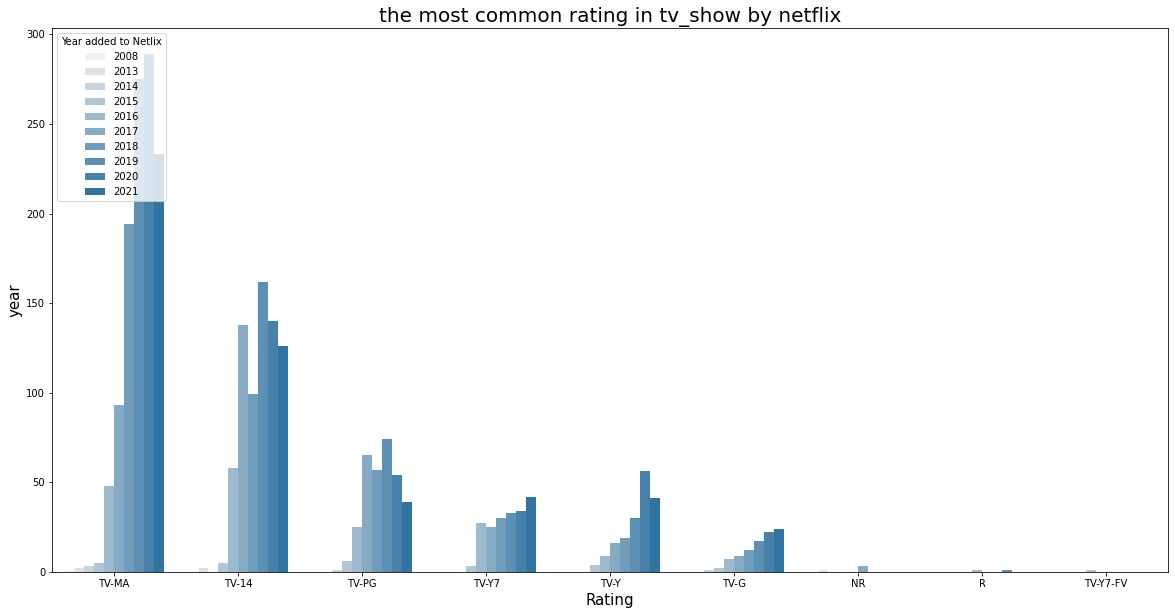

In [ ]:
plt.figure(figsize=[20,10])
order = list(df_tv['rating'].value_counts().index)
base_color = base_color = sns.color_palette()[0]
a=df_tv.date_added.dt.year
tv_g = sns.countplot(data=df_tv,x='rating',hue=a, order=order, color=base_color)
tv_g.set_xlabel('Rating',fontsize = 15)
tv_g.set_ylabel('year',fontsize = 15)
tv_g.set_title("the most common rating in tv_show by netflix",fontsize = 20)
plt.legend(title = 'Year added to Netlix',)

**Waffle Charts**

In [ ]:
countries = df_tv['country'].value_counts()
countries = countries[countries.values > 50]

df_countries = {'country': countries.index.tolist(),'Total' : [" " for x in range(len(countries))]}
df_countries = pd.DataFrame(df_countries)

df_countries.set_index('country', inplace = True)
df_countries['Total'] = list(countries.values)
df_countries

,Total
country,
United States,846
Pakistan,349
United Kingdom,251
Japan,172
South Korea,165
Canada,84
India,81
Taiwan,71
France,65


In [ ]:
total_values = sum(df_countries['Total'])
category_proportions = [(float(value) / total_values) for value in df_countries['Total']]

for i, proportion in enumerate(category_proportions):
    print (df_countries.index.values[i] + ': ' + str(proportion))

United States: 0.3863013698630137
Pakistan: 0.1593607305936073
United Kingdom: 0.11461187214611872
Japan: 0.07853881278538813
South Korea: 0.07534246575342465
Canada: 0.038356164383561646
India: 0.036986301369863014
Taiwan: 0.032420091324200914
France: 0.02968036529680365
Australia: 0.024200913242009132
Spain: 0.024200913242009132


In [ ]:
width = 40
height = 10 
total_num_tiles = width * height
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
waffle_chart = np.zeros((height, width))
category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1       
        waffle_chart[row, col] = category_index

<Figure size 432x288 with 0 Axes>

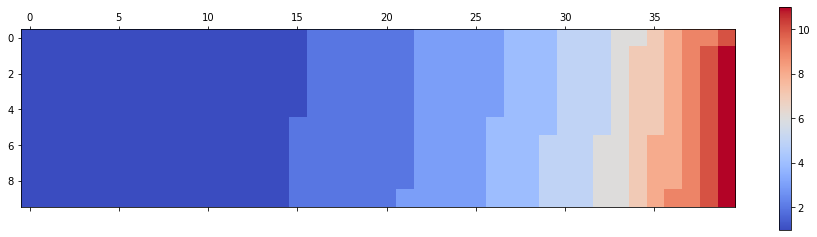

In [ ]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

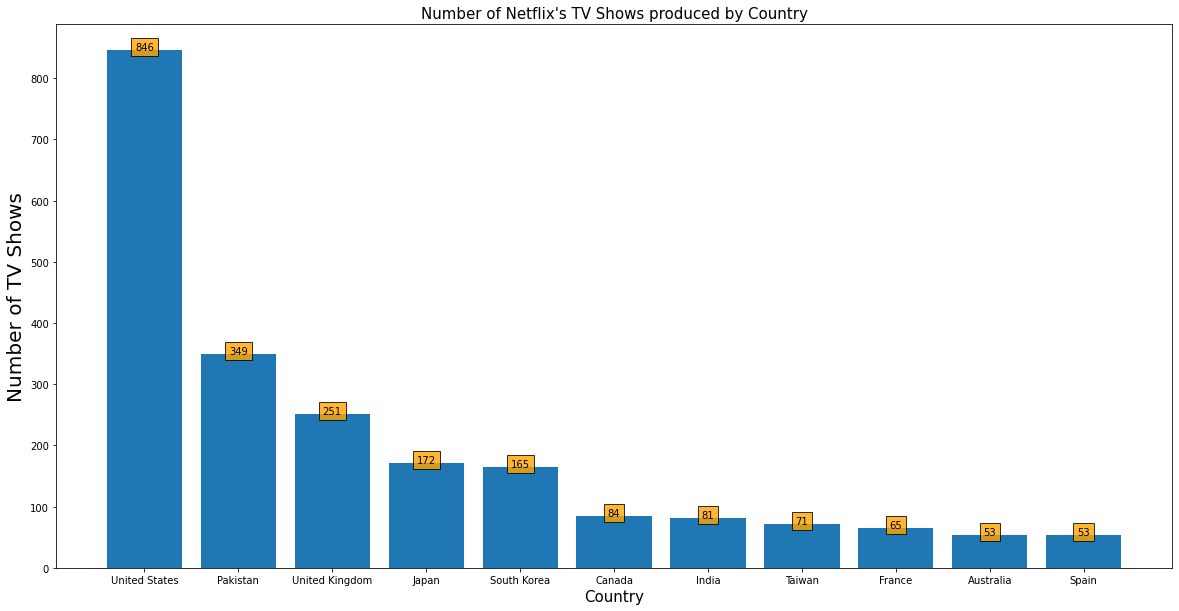

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'orange', alpha =.8))
  
x = countries.index.tolist()
y = countries.values
plt.figure(figsize=[20,10])
plt.bar(x, y)
addlabels(x, y)
plt.title("Number of Netflix's TV Shows produced by Country", fontsize = 15)
plt.xlabel("Country", fontsize = 15)
plt.ylabel("Number of TV Shows", fontsize = 20)
plt.show()

**Regression**

In [ ]:
years = df_tv['release_year'].value_counts()
years = years[years.values >= 10]

df_tot = {'release_year': years.index.tolist(),'total' : [" " for x in range(len(years))]}
df_tot = pd.DataFrame(df_tot)

df_tot.set_index('release_year', inplace = True)
df_tot['total'] = list(years.values)
df_tot['year'] = list(years.index)
df_tot

,total,year
release_year,,
2020,436,2020
2019,397,2019
2018,379,2018
2021,315,2021
2017,265,2017
2016,243,2016
2015,159,2015
2014,88,2014
2012,63,2012


Text(0.5, 1.0, 'Total numbers of TV_shows from 2005 - 2021')

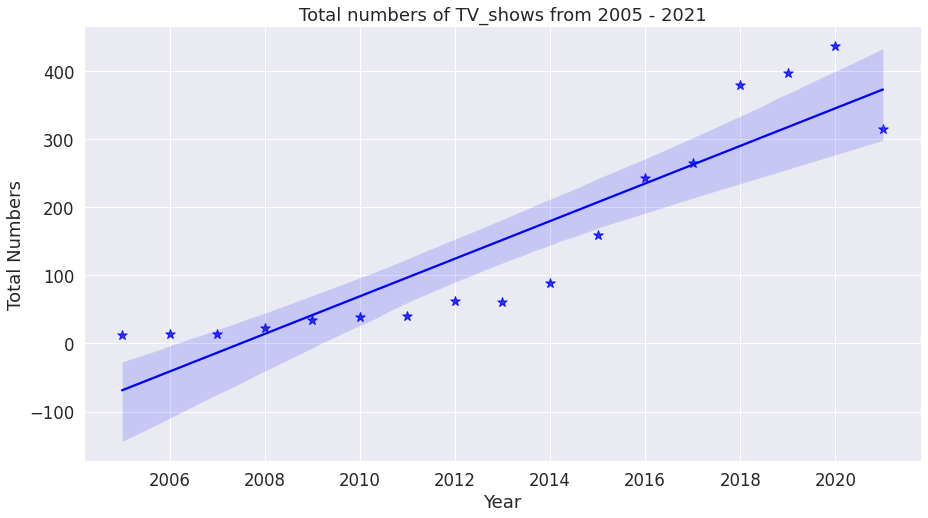

In [ ]:
plt.figure(figsize=(15, 8))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='blue', marker='*', scatter_kws={'s': 100})
ax.set(xlabel='Year', ylabel='Total Numbers')
ax.set_title('Total numbers of TV_shows from 2005 - 2021')

**Word Clouds**

In [ ]:
shows_titles = df_tv['title']
shows_titles = shows_titles.apply(lambda x: x.replace(" ", "_"))
alice_wc = WordCloud(background_color='white', max_words=10000)
alice_wc.generate((" ").join(shows_titles))

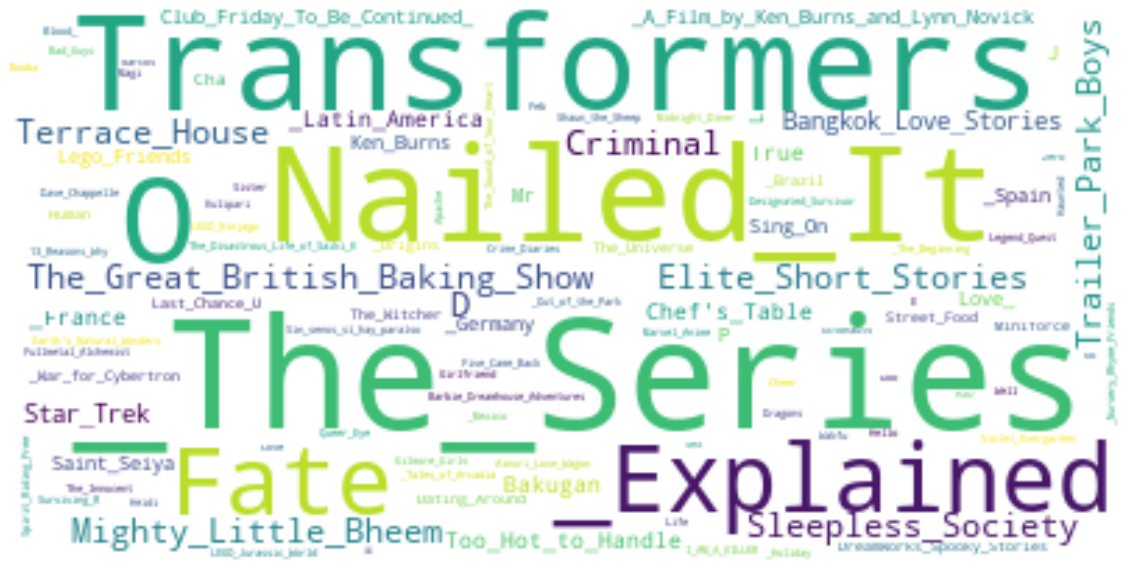

In [ ]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(18)
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()